# 1章 ニューラルネットワークの復習

In [8]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
x = np.random.randn(10, 2)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h = np.dot(x, W1) + b1
a = sigmoid(h)
s = np.dot(a, W2) + b2

class Sigmoid(object):
    def __init__(self):
        self.params = []
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
        
class Affine(object):
    def __init__(self, W, b):
        self.params = [W, b]
        
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out

class TwoLayerNet(object):
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
    
        self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]
        
        self.params = []
        for layer in self.layers:
            self.params += layer.params
    
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
print(s)


[[-0.96632679  1.18701539  0.63206821]
 [-0.866625    1.22451863  0.66108125]
 [-0.87303508  1.60234176  0.51437821]
 [-1.02795923  1.90144345  0.2782701 ]
 [-1.14956791  2.00203035  0.1467783 ]
 [-1.12041045  1.9437553   0.19265209]
 [-1.08030337  1.83071295  0.26851751]
 [-0.71430697  0.75385782  0.94988458]
 [-0.93211355  1.57475142  0.47797354]
 [-0.41265373  0.14358166  1.38130781]]


In [39]:
def MatMul(object):
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
        
    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dw = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx
    
    
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx
    
class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmaxの出力
        self.t = None  # 教師ラベル

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 教師ラベルがone-hotベクトルの場合、正解のインデックスに変換
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx
    

class Softmax:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        self.out = softmax(x)
        return self.out

    def backward(self, dout):
        dx = self.out * dout
        sumdx = np.sum(dx, axis=1, keepdims=True)
        dx -= self.out * sumdx
        return dx
    
class SGD(object):
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]
            

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 重みとバイアスの初期化
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # レイヤの生成
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        # すべての重みと勾配をリストにまとめる
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout


In [40]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append('..')
from dataset import spiral

x, t = spiral.load_data()
print(x.shape)
print(t.shape)

(300, 2)
(300, 3)


| epoch 1 |  iter 10 / 10 | loss 1.13
| epoch 2 |  iter 10 / 10 | loss 1.13
| epoch 3 |  iter 10 / 10 | loss 1.12
| epoch 4 |  iter 10 / 10 | loss 1.12
| epoch 5 |  iter 10 / 10 | loss 1.11
| epoch 6 |  iter 10 / 10 | loss 1.14
| epoch 7 |  iter 10 / 10 | loss 1.16
| epoch 8 |  iter 10 / 10 | loss 1.11
| epoch 9 |  iter 10 / 10 | loss 1.12
| epoch 10 |  iter 10 / 10 | loss 1.13
| epoch 11 |  iter 10 / 10 | loss 1.12
| epoch 12 |  iter 10 / 10 | loss 1.11
| epoch 13 |  iter 10 / 10 | loss 1.09
| epoch 14 |  iter 10 / 10 | loss 1.08
| epoch 15 |  iter 10 / 10 | loss 1.04
| epoch 16 |  iter 10 / 10 | loss 1.03
| epoch 17 |  iter 10 / 10 | loss 0.96
| epoch 18 |  iter 10 / 10 | loss 0.92
| epoch 19 |  iter 10 / 10 | loss 0.92
| epoch 20 |  iter 10 / 10 | loss 0.87
| epoch 21 |  iter 10 / 10 | loss 0.85
| epoch 22 |  iter 10 / 10 | loss 0.82
| epoch 23 |  iter 10 / 10 | loss 0.79
| epoch 24 |  iter 10 / 10 | loss 0.78
| epoch 25 |  iter 10 / 10 | loss 0.82
| epoch 26 |  iter 10 / 10 | loss 

| epoch 229 |  iter 10 / 10 | loss 0.13
| epoch 230 |  iter 10 / 10 | loss 0.14
| epoch 231 |  iter 10 / 10 | loss 0.13
| epoch 232 |  iter 10 / 10 | loss 0.14
| epoch 233 |  iter 10 / 10 | loss 0.13
| epoch 234 |  iter 10 / 10 | loss 0.13
| epoch 235 |  iter 10 / 10 | loss 0.13
| epoch 236 |  iter 10 / 10 | loss 0.13
| epoch 237 |  iter 10 / 10 | loss 0.14
| epoch 238 |  iter 10 / 10 | loss 0.13
| epoch 239 |  iter 10 / 10 | loss 0.13
| epoch 240 |  iter 10 / 10 | loss 0.14
| epoch 241 |  iter 10 / 10 | loss 0.13
| epoch 242 |  iter 10 / 10 | loss 0.13
| epoch 243 |  iter 10 / 10 | loss 0.13
| epoch 244 |  iter 10 / 10 | loss 0.13
| epoch 245 |  iter 10 / 10 | loss 0.13
| epoch 246 |  iter 10 / 10 | loss 0.13
| epoch 247 |  iter 10 / 10 | loss 0.13
| epoch 248 |  iter 10 / 10 | loss 0.13
| epoch 249 |  iter 10 / 10 | loss 0.13
| epoch 250 |  iter 10 / 10 | loss 0.13
| epoch 251 |  iter 10 / 10 | loss 0.13
| epoch 252 |  iter 10 / 10 | loss 0.12
| epoch 253 |  iter 10 / 10 | loss 0.12


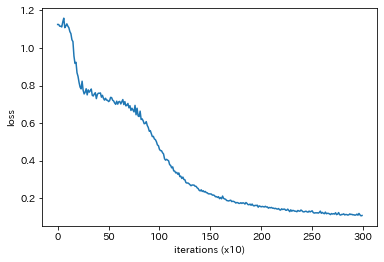

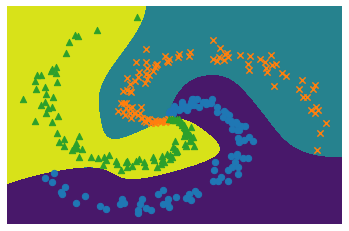

In [44]:
# coding: utf-8
import sys
#sys.path.append('..')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.optimizer import SGD
from dataset import spiral
from common.functions import softmax, cross_entropy_error

import matplotlib.pyplot as plt
#from two_layer_net import TwoLayerNet


# ハイパーパラメータの設定
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 学習で使用する変数
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # データのシャッフル
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 勾配を求め、パラメータを更新
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 定期的に学習経過を出力
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| epoch %d |  iter %d / %d | loss %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0


# 学習結果のプロット
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

# 境界領域のプロット
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# データ点のプロット
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()
